## Brussels United FC

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [65]:
players = pd.read_csv("fifa.csv")
players.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [66]:
#Droping unnecessary columns
players.drop(["Photo","Flag","Club Logo","Loaned From"], axis=1, inplace=True)
players

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,"May 3, 2017",2019,5'9,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,"Mar 19, 2018",2020,6'3,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,33.0,"Jul 1, 2017",2021,5'8,148lbs,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,Lean,RW,34.0,"Apr 24, 2018",2019,5'10,154lbs,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [67]:
#Modifying Value Data Types with SLicing
def value_slice(x):
    if "M" in x:
        return(pd.to_numeric(x[1:len(x)-1])*100)
    else:
        return(pd.to_numeric(x[1:len(x)-1]))

In [68]:
players["Value"] = players.Value.apply(value_slice)

In [69]:
players.Value.dtypes

dtype('float64')

In [70]:
#Modifying Wage Data Type
def wage_conv(x):
    return(pd.to_numeric(x[1:len(x)-1]))

In [71]:
players["Wage"] = players.Wage.apply(wage_conv)

In [72]:
players.Wage.dtypes

dtype('float64')

In [73]:
players.Joined[18000][-4:]

'2018'

In [74]:
#Modifying Joined Date
def joined_conv(x):
        return(pd.to_numeric(x[-4:]))

In [75]:
#Changing null value to string random value for indexing
players["Joined"] = players["Joined"].replace(np.NaN,"1900")

In [76]:
#Applying def function for slicing and changing the data type.
players["Joined"] = players["Joined"].apply(joined_conv)

In [77]:
#Again turning imputed value to np.Nan
players["Joined"] = players["Joined"].replace("1900",np.NaN)

In [78]:
players["Joined"].dtypes

dtype('int64')

In [79]:
#Changing data type for Contract Valid Till
players["Contract Valid Until"] = pd.to_datetime(players["Contract Valid Until"])

In [80]:
#Changing null value to One value
players["Height"] = players["Height"].replace(np.nan,"99'99") 

In [81]:
#Changing value of Height
height_split = players["Height"].str.split("'")

In [82]:
def hght(x):
        return(round((((int(x[0])*12)+int(x[1]))/12),2))

In [83]:
players["Height"] = height_split.apply(hght) 
players

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,11050.0,565.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,2004,2021-01-01,5.58,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7700.0,405.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2018,2022-01-01,6.17,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,11850.0,290.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,2017,2022-01-01,5.75,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,7200.0,260.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2011,2020-01-01,6.33,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,10200.0,355.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,2015,2023-01-01,5.92,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,2017,2019-01-01,5.75,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,2018,2020-01-01,6.25,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,33.0,2017,2021-01-01,5.67,148lbs,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,3.0,2.0,Medium/ Medium,Lean,RW,34.0,2018,2019-01-01,5.83,154lbs,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [84]:
#Again changing value to the original null value
players["Height"] = players["Height"].replace(107.25,np.NaN)

### Changing data type of Weight

In [85]:
#filling weight with random value for missing data
players["Weight"] = players["Weight"].replace(np.NaN,"999lbs") 

In [86]:
def weight_clean(x):
    return (pd.to_numeric(x[0:x.index('l')]))

In [87]:
players["Weight"] = players["Weight"].apply(weight_clean) 

In [88]:
#Turning back to missing value
players["Weight"] = players["Weight"].replace(999,np.NaN) 

In [89]:
players.Weight.dtypes

dtype('float64')

## Changing data type of Release Clause

In [90]:
players["Release Clause"] = players["Release Clause"].replace(np.NaN,"$99999K")

In [91]:
players["Release Clause"] = players["Release Clause"].apply(value_slice)

In [92]:
players

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,11050.0,565.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,2004,2021-01-01,5.58,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,22650.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7700.0,405.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,2018,2022-01-01,6.17,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,12710.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,11850.0,290.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,2017,2022-01-01,5.75,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,22810.0
3,193080,De Gea,27,Spain,91,93,Manchester United,7200.0,260.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,2011,2020-01-01,6.33,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,13860.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,10200.0,355.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,2015,2023-01-01,5.92,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,19640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,2017,2019-01-01,5.75,134.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,2018,2020-01-01,6.25,170.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,33.0,2017,2021-01-01,5.67,148.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,3.0,2.0,Medium/ Medium,Lean,RW,34.0,2018,2019-01-01,5.83,154.0,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143.0


## Missing Values Treatment

In [93]:
players.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                        241
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Body Type                    48
Position                     60
Jersey Number                60
Joined                        0
Contract Valid Until        289
Height                       48
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Accelera

In [94]:
cols = ["Contract Valid Until","Crossing","Finishing","HeadingAccuracy","ShortPassing","Volleys","Dribbling","Curve","FKAccuracy","LongPassing","BallControl",
"Acceleration","SprintSpeed","Agility","Reactions","Balance","ShotPower","Jumping","Stamina","Strength","LongShots","Aggression",
"Interceptions","Positioning","Vision","Penalties","Composure","Marking","StandingTackle","SlidingTackle","GKDiving","GKHandling",
"GKKicking","GKPositioning","GKReflexes"]

In [95]:
for i in cols:
    players[i]= players[i].transform(lambda x:x.fillna(x.mean()))

# Exploratory Analysis

## 1. Plot the distribution of Overall rating for all players.

<AxesSubplot:ylabel='Density'>

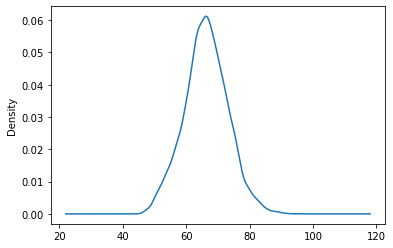

In [96]:
players['Overall'].plot(kind='kde')

In [97]:
players['Overall'].skew()

0.06718492227833812

### 2. Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

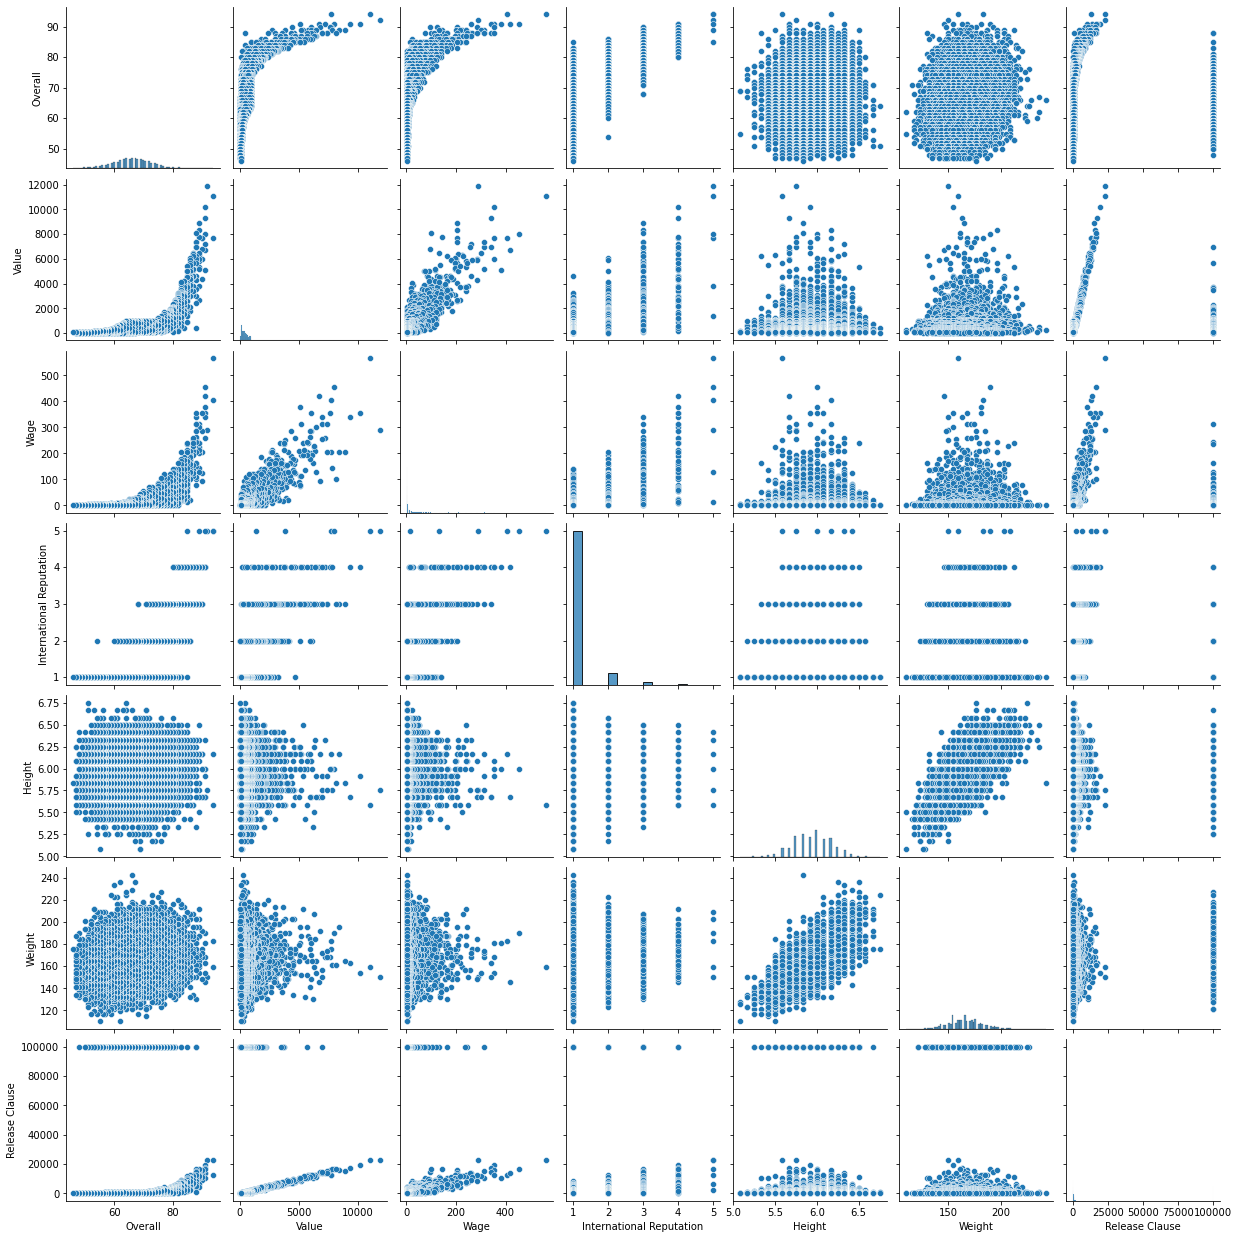

In [98]:
sns.pairplot(players[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])

### 3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [99]:
players['year'] = pd.DatetimeIndex(players['Contract Valid Until']).year
players1=players[players['year']==2020].sort_values(by='Overall',ascending=False).head(20)
players1[['ID', 'Name','Overall','Potential','Value',
         'Wage','Age','International Reputation','Skill Moves','Position','Height', 'Weight','Release Clause']]

,ID,Name,Overall,Potential,Value,Wage,Age,International Reputation,Skill Moves,Position,Height,Weight,Release Clause
3,193080,De Gea,91,93,7200.0,260.0,27,4.0,1.0,GK,6.33,168.0,13860.0
6,177003,L. Modrić,91,91,6700.0,420.0,32,4.0,4.0,RCM,5.67,146.0,13740.0
8,155862,Sergio Ramos,91,91,5100.0,380.0,32,4.0,3.0,RCB,6.00,181.0,10460.0
5,183277,E. Hazard,91,91,9300.0,340.0,27,4.0,4.0,LF,5.67,163.0,17210.0
13,168542,David Silva,90,90,6000.0,285.0,32,4.0,4.0,LCM,5.67,148.0,11100.0
21,179813,E. Cavani,89,89,6000.0,200.0,31,4.0,3.0,LS,6.08,170.0,11100.0
24,138956,G. Chiellini,89,89,2700.0,215.0,33,4.0,2.0,LCB,6.17,187.0,4460.0
31,190460,C. Eriksen,88,91,7350.0,205.0,26,3.0,4.0,CAM,5.92,168.0,14150.0
39,164240,Thiago Silva,88,88,2400.0,165.0,33,4.0,2.0,RCB,6.00,181.0,4440.0
50,175943,D. Mertens,87,87,4500.0,135.0,31,3.0,4.0,RF,5.58,134.0,7650.0


### a)What would the average wage for this set of players be?

In [100]:
print("The average wage of top 20 players by overall rating is=",players1['Wage'].mean())

The average wage of top 20 players by overall rating is= 205.45


### b)What is the average age?

In [101]:
print("The average age of top 20 players by overall rating is=",players1['Age'].mean())

The average age of top 20 players by overall rating is= 30.65


### c)Is there a correlation between the Overall rating and Value for these players?

In [102]:
players2=players[['Overall','Value']]
cor=players2.corr()
print('Yes it is-',cor.iloc[0,1])

Yes it is- 0.534644752268538


# 4. Generate tables containing the top 5 players by Overall rating for each unique position.

In [103]:
players3=players[['Name','Position','Overall']]
players4=pd.pivot_table(players3,index=['Position','Name'])
players4

Overall
Position Name                 
CAM      A. Adouyev       62.0
         A. Ajagun        69.0
         A. Aktas         54.0
         A. Al Fraidi     67.0
         A. Al Nazera     62.0
...                        ...
ST       Zé Turbo         67.0
         Álex López       66.0
         Álvaro           70.0
         Ángel            79.0
         Éder             75.0

[18037 rows x 1 columns]

### a)	Are there any players appearing in more than one Table. Please point out such players.

In [104]:
d1=players.groupby(['Position']).mean().T
l1=d1.columns
l1

Index(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM',
       'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF',
       'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object', name='Position')

In [105]:
a=players4.loc[l1[0]].sort_values('Overall',ascending=False).head(5)
for i in range(1,len(l1)):
    b=players4.loc[l1[i]].sort_values('Overall',ascending=False).head(5)
    a=pd.concat([a,b])

In [106]:
c=pd.merge(a,players[['ID','Name','Position','Overall','Wage']],on=['Name','Overall'],how='left')

In [107]:
final_c=c.groupby(['Position','Name']).mean()

In [108]:
for i in range(0,len(l1)):
    print("For",l1[i])
    print(final_c.loc[l1[i]])
    print()

For CAM
                 Overall        ID   Wage
Name                                     
A. Griezmann        89.0  194765.0  145.0
C. Eriksen          88.0  190460.0  205.0
M. Özil             86.0  176635.0  190.0
Roberto Firmino     86.0  201942.0  195.0
T. Müller           86.0  189596.0  135.0

For CB
             Overall        ID   Wage
Name                                 
D. Godín        90.0  182493.0  125.0
M. Benatia      86.0  177509.0  160.0
N. Otamendi     85.0  192366.0  170.0
S. Umtiti       87.0  205600.0  205.0
V. Kompany      85.0  139720.0  170.0

For CDM
                 Overall        ID   Wage
Name                                     
Casemiro            88.0  200145.0  285.0
Fabinho             84.0  209499.0  120.0
Fernandinho         86.0  135507.0  185.0
M. Pjanić           86.0  180206.0  180.0
Sergio Busquets     89.0  189511.0  315.0

For CF
              Overall        ID  Wage
Name                                 
A. Milik         81.0  205175.0  71.0

In [109]:
dup1=final_c[final_c.duplicated(keep=False)]
dup2=dup1.drop_duplicates('ID')

In [110]:
dup2.count()

Overall    0
ID         0
Wage       0
dtype: int64

### b) What is the average wage one can expect to pay for the top 5 in every position?

In [111]:
wage=final_c.groupby(['Position']).mean()
print('Average wage to be paid to top 5 players by position is as follows:')
wage.loc[:,('Wage')]
#wage.drop('Overall',axis=1,inplace=True)

Average wage to be paid to top 5 players by position is as follows:


Position
CAM    174.0
CB     166.0
CDM    217.0
CF      47.4
CM     130.6
GK     192.8
LAM     81.6
LB     177.2
LCB    162.0
LCM    184.4
LDM    138.0
LF     123.2
LM     152.6
LS     130.2
LW     261.0
LWB     33.0
RAM     46.6
RB     155.4
RCB    219.0
RCM    238.6
RDM    105.0
RF     148.0
RM     126.4
RS     130.4
RW     202.0
RWB     44.2
ST     294.0
Name: Wage, dtype: float64

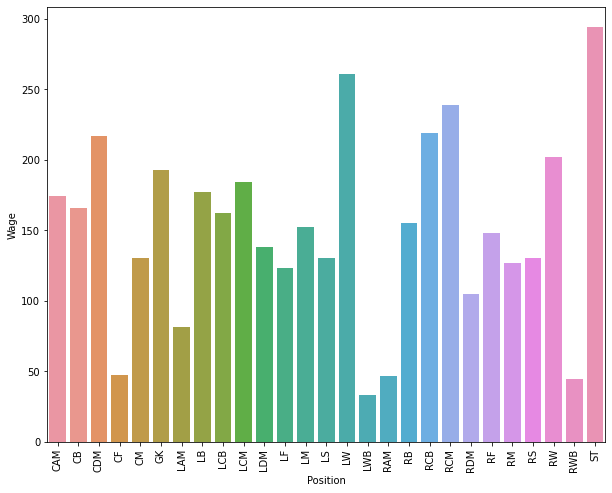

In [112]:
plt.figure(figsize=(10,8))
sns.barplot(x=wage.index,y=wage.Wage)
plt.xticks(rotation = 90)
plt.show()